In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Projects\NLP_Projects\spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [4]:
df.columns=['label','message']

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [11]:
len(df)

5572

In [13]:
df.shape

(5572, 2)

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()

In [10]:
corpus=[]
for i in range(0,len(df)):
    k=re.sub('[^a-zA-Z]',' ',df['message'][i])
    k=k.lower()
    k=k.split()
    k=[ps.stem(w) for w in k if w not in stopwords.words('english')]
    k=' '.join(k)
    corpus.append(k)

In [16]:
#creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(5572, 5000)

In [18]:
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [21]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [22]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'y_pred')

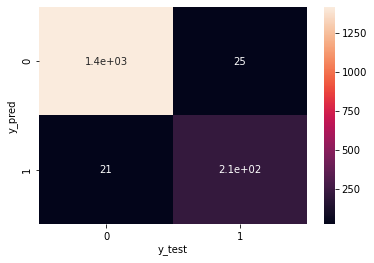

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.972488038277512

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1439
           1       0.89      0.91      0.90       233

    accuracy                           0.97      1672
   macro avg       0.94      0.95      0.94      1672
weighted avg       0.97      0.97      0.97      1672



## Using lemmatizer instead of Stemming

In [39]:
corpus=[]
lm=WordNetLemmatizer()
for i in range(0,len(df)):
    k=re.sub('[^a-zA-Z]',' ',df['message'][i])
    k=k.lower()
    k=k.split()
    k=[lm.lemmatize(w) for w in k if w not in stopwords.words('english')]
    k=' '.join(k)
    corpus.append(k)

In [40]:
#creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [41]:
y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [43]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [44]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [46]:
cm=confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'y_pred')

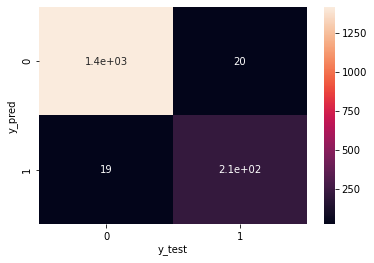

In [47]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [48]:
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9766746411483254

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1439
           1       0.91      0.92      0.92       233

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## *Lemmatizer performs well compare to Stemming*